<a href="https://colab.research.google.com/github/Suchitra-V31/Handling-Missing-values/blob/main/Handling_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MISSING VALUES**

Missing value in a dataset is due to various reasons.

1.They hesitate to put down the information

2.Survey informations are not that valid

3.Men--salary

4.Women---age

5.People may have died----NAN


**TYPES OF MISSING VALUES**

1. Missing Completely At Random(MCAR)
2.Missing data Not At Random(MNAR)
3.Missing At Random(MAR)
---



**1.Missing Completely at Random, MCAR:** A variable is missing completely at
random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely **no relationship** between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [45]:
import pandas as pd

In [46]:
data=pd.read_csv('/content/train.csv')

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this Embarked has only 2 missing values which is an example of MCAR . Since it has no relationship with the other values.



**2.Missing Data Not At Random(MNAR):** Systematic missing Values There is absolutely **some relationship** between the data missing and any other values, observed or missing, within the dataset.


In the above data , Age and Cabin has relationship therefore it is an example of MNAR

**3.Missing At Random(MAR)**

Men---hide their salary

Women---hide their age

**ALL TECHNIQUES TO HANDLE MISSING VALUES:**
1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

**1.Mean/ MEdian /Mode imputation:**
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [49]:
data=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [50]:
# lets see the mean of nan values
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [56]:
# we can replace this nan value either with mean/median/mode
def impute_nan(data,variable,mean):
 data[variable+'mean']=data[variable].fillna(mean)

In [55]:
mean=data.Age.mean()
mean

29.69911764705882

In [57]:
impute_nan(data,'Age',median)

In [58]:
data.head()

,Survived,Age,Fare,Agemean
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


**2.Random Sample Imputation:**
It consists of taking random observations from the dataset and we use the obs to replace the nan values. It assumes that data is MCAR

In [88]:
data=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
median=data['Age'].median()
median

28.0

In [90]:
def impute_nan(data,variable,median):
    data[variable+"_median"]=data[variable].fillna(median)
    data[variable+"_random"]=data[variable]
    ##It will have the random sample to fill the na
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable+'_random']=random_sample


In [91]:
impute_nan(data,"Age",median)

In [92]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [93]:
import matplotlib.pyplot as plt


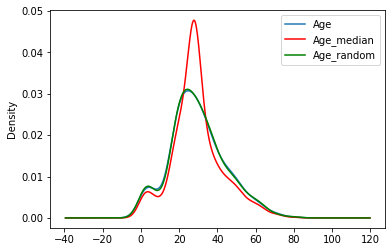

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**3.Capturing nan values with new feature:**
It works well when data are MNAR

In [78]:
import numpy as np

In [95]:
data=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [96]:
def impute_nan(data,variable):
  data[variable+'nan']=np.where(data[variable].isnull(),1,0)

In [97]:
impute_nan(data,'Age')

In [99]:
data.head(10)

,Survived,Age,Fare,Agenan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


**4.End of distribution imputation:**
It will consider the values present at the end of the distribution.

In [100]:
data=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


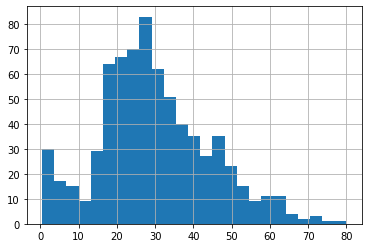

In [102]:
data.Age.hist(bins=25)

In [105]:
extreme=data.Age.mean()+3*data.Age.std()

In [110]:
def impute_nan(data,variable,extreme):
  data[variable+'_extreme']=data[variable].fillna(extreme)

In [111]:
impute_nan(data,'Age',extreme)

In [112]:
data.head()

,Survived,Age,Fare,Ageextreme,Age_extreme
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In case of arbitrary distribution we use arbitrary values which is not mostly used. So let's omit it.